<a href="https://colab.research.google.com/github/CuongPham88888/code_AI/blob/main/project_cuoiky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [43]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Final/train',target_size=(128,128), batch_size=32, class_mode='categorical')

Found 869 images belonging to 15 classes.


In [44]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Final/validation',target_size=(128,128), batch_size=32, class_mode='categorical')

Found 240 images belonging to 15 classes.


In [45]:
training_set.class_indices

{'CS_Den_Vau': 0,
 'CS_Noo_Phuoc_Thinh': 1,
 'CS_Son_Tung_MTP': 2,
 'DV_Ninh_duong_lan_ngoc': 3,
 'DV_RIBI_SHACHI': 4,
 'DV_Thai_Vu': 5,
 'DV_Vinh_Rau': 6,
 'MC_Lai_Van_Sam': 7,
 'MC_Quyen_Linh': 8,
 'NS_Hoai_Linh': 9,
 'NS_Vanh_Leg': 10,
 'NS_Xuan_Bac': 11,
 'Rapper_Karik': 12,
 'Streamer_Viruss': 13,
 'Streamer_pewpew': 14}

In [46]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(128,128,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))                             # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))                           # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))                            # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))                              # Tích chập 512 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(15,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                  

In [47]:
opt=SGD(lr=0.01,momentum=0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [48]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
history=model.fit(training_set,epochs=500,batch_size=100,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)]) # verbose=1 để hiển thị quá trinh học

Epoch 1/500
28/28 [==============================] - 8s 260ms/step - loss: 2.9075 - accuracy: 0.0852 - val_loss: 2.7192 - val_accuracy: 0.0667
Epoch 2/500
28/28 [==============================] - 7s 246ms/step - loss: 2.6615 - accuracy: 0.1082 - val_loss: 2.7144 - val_accuracy: 0.0708
Epoch 3/500
28/28 [==============================] - 7s 244ms/step - loss: 2.6619 - accuracy: 0.1070 - val_loss: 2.7032 - val_accuracy: 0.0625
Epoch 4/500
28/28 [==============================] - 8s 302ms/step - loss: 2.6615 - accuracy: 0.1013 - val_loss: 2.7466 - val_accuracy: 0.0667
Epoch 5/500
28/28 [==============================] - 7s 245ms/step - loss: 2.5697 - accuracy: 0.1404 - val_loss: 2.6472 - val_accuracy: 0.1250
Epoch 6/500
28/28 [==============================] - 7s 247ms/step - loss: 2.6044 - accuracy: 0.1358 - val_loss: 2.6892 - val_accuracy: 0.1042
Epoch 7/500
28/28 [==============================] - 7s 247ms/step - loss: 2.4277 - accuracy: 0.2129 - val_loss: 2.5008 - val_accuracy: 0.2125

Sai số kiểm tra là:  0.06677789986133575
Độ chính xác kiểm tra là:  0.9833333492279053


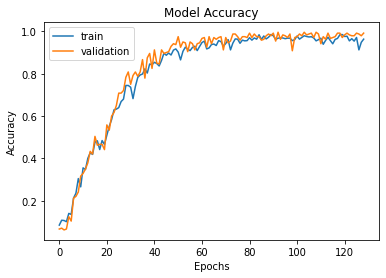

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show
score = model.evaluate(validation,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

In [51]:
model.save("face.h5")

In [52]:
model_CNN=load_model('face.h5')

[[2.3266848e-37 5.7949321e-13 6.2259553e-24 1.0185221e-07 9.9999988e-01
  1.9265882e-29 0.0000000e+00 2.5163219e-22 0.0000000e+00 1.0592354e-32
  2.2909752e-26 5.0825478e-22 2.3455358e-27 1.1283118e-17 2.0575187e-29]]
[4]
0.9999999
DV_RIBI_SHACHI


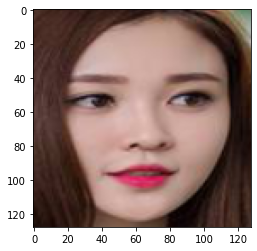

In [59]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

data = np.ndarray(shape=(1, 128, 128, 3), dtype=np.float32)
image = Image.open('/content/drive/MyDrive/Final/validation/DV_RIBI_SHACHI/15.png')

size = (128, 128)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
classIndex = np.argmax(prediction,axis=-1)
probabilityValue= np.amax(prediction)

print(prediction)
print(classIndex)
print(probabilityValue)
imgplot = plt.imshow(image)
if classIndex==0:
  print('CS_Den_Vau')
if classIndex==1:
  print('CS_Noo_Phuoc_Thinh')
if classIndex==2:
  print('CS_son_Tung_MTP')
if classIndex==3:
  print('DV_Ninh_Duong_Lan_Ngoc')
if classIndex==4:
  print('DV_RIBI_SHACHI')
if classIndex==5:
  print('DV_Thai_Vu')
if classIndex==6:
  print('DV_Vinh_Rau')
if classIndex==7:
  print('MC_Lai_Van_Sam')
if classIndex==8:
  print('MC_Quyen_Linh')
if classIndex==9:
  print('NS_Hoai_Linh')
if classIndex==10:
  print('NS_Vanh_Leg')
if classIndex==11:
  print('NS_Xuan_Bac')
if classIndex==12:
  print('Rapper_Karik')
if classIndex==13:
  print('Streamer_Viruss')
if classIndex==14:
  print('Streamer_pewpew')
plt.show()

[[5.9524795e-11 9.4165993e-18 3.5115156e-16 1.6196653e-08 6.8190827e-16
  2.2692753e-10 2.3072440e-04 9.9976927e-01 9.4736197e-10 4.3032844e-09
  1.2462714e-14 7.0183597e-09 1.0571886e-14 4.9959060e-13 1.3920299e-11]]
[7]
0.9997693
MC_Lai_Van_Sam


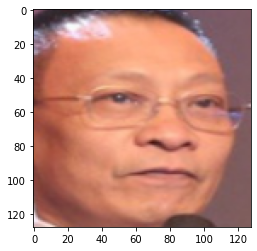

In [78]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

data = np.ndarray(shape=(1, 128, 128, 3), dtype=np.float32)
image = Image.open('/content/drive/MyDrive/Final/validation/MC_Lai_Van_Sam/5.png')

size = (128, 128)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
classIndex = np.argmax(prediction,axis=-1)
probabilityValue= np.amax(prediction)

print(prediction)
print(classIndex)
print(probabilityValue)
imgplot = plt.imshow(image)
if classIndex==0:
  print('CS_Den_Vau')
if classIndex==1:
  print('CS_Noo_Phuoc_Thinh')
if classIndex==2:
  print('CS_son_Tung_MTP')
if classIndex==3:
  print('DV_Ninh_Duong_Lan_Ngoc')
if classIndex==4:
  print('DV_RIBI_SHACHI')
if classIndex==5:
  print('DV_Thai_Vu')
if classIndex==6:
  print('DV_Vinh_Rau')
if classIndex==7:
  print('MC_Lai_Van_Sam')
if classIndex==8:
  print('MC_Quyen_Linh')
if classIndex==9:
  print('NS_Hoai_Linh')
if classIndex==10:
  print('NS_Vanh_Leg')
if classIndex==11:
  print('NS_Xuan_Bac')
if classIndex==12:
  print('Rapper_Karik')
if classIndex==13:
  print('Streamer_Viruss')
if classIndex==14:
  print('Streamer_pewpew')
plt.show()

[[1.2494110e-10 5.0893286e-11 8.2125966e-11 5.3282980e-13 2.9554711e-19
  6.1219788e-01 3.6945736e-01 1.1172103e-10 8.1457289e-12 1.4299510e-02
  3.9719916e-03 5.3308500e-09 3.4411188e-10 7.3207899e-05 2.6308474e-08]]
[5]


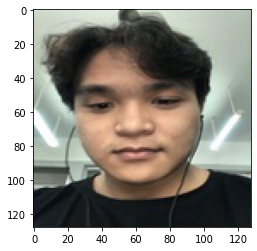

DV_Thai_Vu
Tỉ lệ giống của bạn là: 0.6121979 %


In [79]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

model=load_model('drive/MyDrive/Final/face.h5')
data = np.ndarray(shape=(1, 128, 128, 3), dtype=np.float32)
image = Image.open('/content/drive/MyDrive/Final/text/Cuong.jpg')

size = (128, 128)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
classIndex = np.argmax(prediction,axis=-1)
probabilityValue= np.amax(prediction)
print(prediction)
print(classIndex)
imgplot = plt.imshow(image)
plt.show()
if classIndex==0:
  print('CS_Den_Vau')
if classIndex==1:
  print('CS_Noo_Phuoc_Thinh')
if classIndex==2:
  print('CS_son_Tung_MTP')
if classIndex==3:
  print('DV_Ninh_Duong_Lan_Ngoc')
if classIndex==4:
  print('DV_RIBI_SHACHI')
if classIndex==5:
  print('DV_Thai_Vu')
if classIndex==6:
  print('DV_Vinh_Rau')
if classIndex==7:
  print('MC_Lai_Van_Sam')
if classIndex==8:
  print('MC_Quyen_Linh')
if classIndex==9:
  print('NS_Hoai_Linh')
if classIndex==10:
  print('NS_Vanh_Leg')
if classIndex==11:
  print('NS_Xuan_Bac')
if classIndex==12:
  print('Rapper_Karik')
if classIndex==13:
  print('Streamer_Viruss')
if classIndex==14:
  print('Streamer_pewpew')
print('Tỉ lệ giống của bạn là:' , probabilityValue,'%')

[[1.77809513e-22 1.54436652e-12 2.82779026e-11 1.28548954e-17
  9.47991135e-17 1.39983713e-25 1.16528783e-25 2.59817201e-36
  2.52015079e-33 2.01128578e-19 1.03866198e-15 5.83255365e-29
  1.00000000e+00 9.98895384e-14 1.10032913e-27]]
[12]


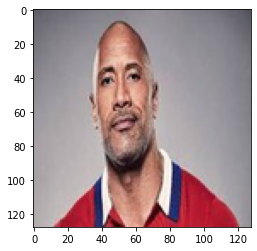

Rapper_Karik
Tỉ lệ giống của bạn là: 1.0 %


In [80]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

model=load_model('drive/MyDrive/Final/face.h5')
data = np.ndarray(shape=(1, 128, 128, 3), dtype=np.float32)
image = Image.open('/content/drive/MyDrive/Final/text/TheRock.jpg')

size = (128, 128)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
classIndex = np.argmax(prediction,axis=-1)
probabilityValue= np.amax(prediction)
print(prediction)
print(classIndex)
imgplot = plt.imshow(image)
plt.show()
if classIndex==0:
  print('CS_Den_Vau')
if classIndex==1:
  print('CS_Noo_Phuoc_Thinh')
if classIndex==2:
  print('CS_son_Tung_MTP')
if classIndex==3:
  print('DV_Ninh_Duong_Lan_Ngoc')
if classIndex==4:
  print('DV_RIBI_SHACHI')
if classIndex==5:
  print('DV_Thai_Vu')
if classIndex==6:
  print('DV_Vinh_Rau')
if classIndex==7:
  print('MC_Lai_Van_Sam')
if classIndex==8:
  print('MC_Quyen_Linh')
if classIndex==9:
  print('NS_Hoai_Linh')
if classIndex==10:
  print('NS_Vanh_Leg')
if classIndex==11:
  print('NS_Xuan_Bac')
if classIndex==12:
  print('Rapper_Karik')
if classIndex==13:
  print('Streamer_Viruss')
if classIndex==14:
  print('Streamer_pewpew')
print('Tỉ lệ giống của bạn là:' , probabilityValue,'%')